## Analysis of the online Retail dataset

### 1. Import libraries to be used in the project

In [75]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")


#### 2. Load and inspect the dataset

In [76]:
# a. Load the datasets and inpect the columns

# First
df1 =pd.read_csv("online_retail_II.csv",encoding='ISO-8859-1', parse_dates=['InvoiceDate'])
df1.columns
df1.info()

# second
df2 = pd.read_csv("Online_Retail.csv",encoding='ISO-8859-1', parse_dates=['InvoiceDate'])
df2.columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   CustomerId   417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


C:\Users\dante\AppData\Local\Temp\ipykernel_13784\3654798592.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv("Online_Retail.csv",encoding='ISO-8859-1', parse_dates=['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerId   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [77]:
# rename columns to match the both datasets
df1.rename(columns={'Invoice':'InvoiceNo'},inplace=True)
df1.rename(columns={'Price':'UnitPrice'},inplace=True)

df2.rename(columns={'CustomerID':'CustomerId'},inplace=True)


In [78]:
# 3. join the datasets
df = pd.concat([df1,df2],ignore_index=True)

# Quick Overview
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067370 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067370 non-null  object        
 1   StockCode    1067370 non-null  object        
 2   Description  1062988 non-null  object        
 3   Quantity     1067370 non-null  int64         
 4   InvoiceDate  1067370 non-null  datetime64[ns]
 5   UnitPrice    1067370 non-null  float64       
 6   CustomerId   824363 non-null   float64       
 7   Country      1067370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerId     243007
Country             0
dtype: int64

### 3. Data Cleaning and Feature Engineering

In [90]:
#  Convert InvoiceDate to datetime format (invalid parsing becomes NaT)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors="coerce")

#  Drop rows where CustomerId is missing (incomplete transactions)
df = df.dropna(subset=["CustomerId"])

# Remove rows with negative or zero Quantity or UnitPrice (e.g., returns, errors)
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Create new column: TotalAmount = Quantity × UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

#  Convert CustomerId to string (from float) to treat it as a true ID
df['CustomerId'] = df['CustomerId'].astype(int).astype(str)

#  Drop any exact duplicate rows
df.drop_duplicates(inplace=True)

#  Check if any cancelled invoices (starting with 'C') still exist
cancelled_count = df['InvoiceNo'].astype(str).str.upper().str.startswith('C').sum()
print(f"Cancelled invoices remaining: {cancelled_count}")
df.info()



Cancelled invoices remaining: 0
<class 'pandas.core.frame.DataFrame'>
Index: 779424 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    779424 non-null  object        
 1   StockCode    779424 non-null  object        
 2   Description  779424 non-null  object        
 3   Quantity     779424 non-null  int64         
 4   InvoiceDate  779424 non-null  datetime64[ns]
 5   UnitPrice    779424 non-null  float64       
 6   CustomerId   779424 non-null  object        
 7   Country      779424 non-null  object        
 8   TotalAmount  779424 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 59.5+ MB


In [91]:
# confirm that you have a clean dataset
df.info()
print(df.columns)
df.shape
df.describe()
print(df.isnull().sum())
df.tail(20)

# export to have a clean data to do analysis
df.to_csv('cleaned_online_retail.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 779424 entries, 0 to 1067369
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    779424 non-null  object        
 1   StockCode    779424 non-null  object        
 2   Description  779424 non-null  object        
 3   Quantity     779424 non-null  int64         
 4   InvoiceDate  779424 non-null  datetime64[ns]
 5   UnitPrice    779424 non-null  float64       
 6   CustomerId   779424 non-null  object        
 7   Country      779424 non-null  object        
 8   TotalAmount  779424 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 59.5+ MB
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerId', 'Country', 'TotalAmount'],
      dtype='object')
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Cu

#### 4. Exploratory Data Analysis (EDA)


##### 4.1 Sales Trends

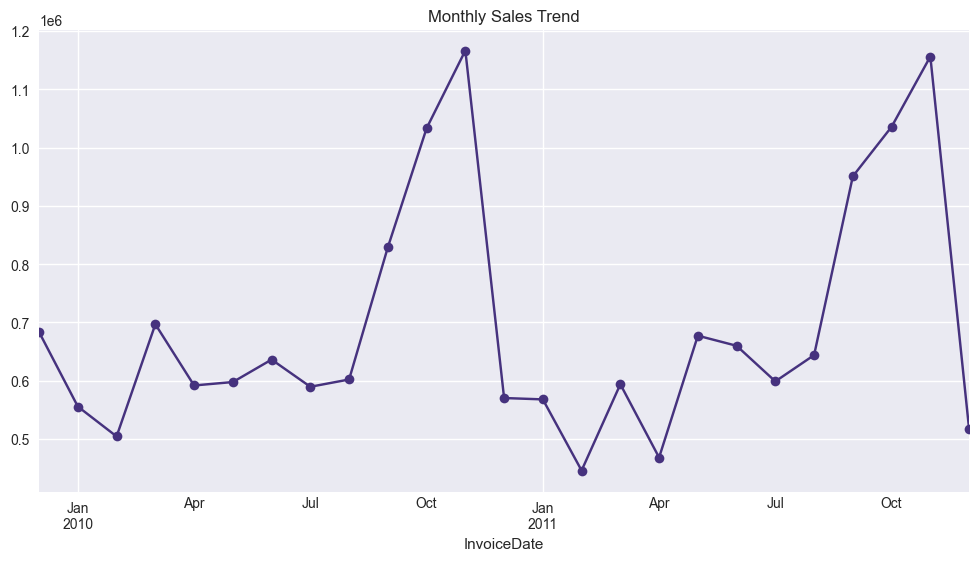

In [92]:
# sales overtime
sales_trend =df.groupby(df["InvoiceDate"].dt.to_period('M'))["TotalAmount"].sum()
sales_trend.plot(kind='line', figsize=(12,6),title="Monthly Sales Trend",marker='o')
plt.show()

##### 4.2 Top products


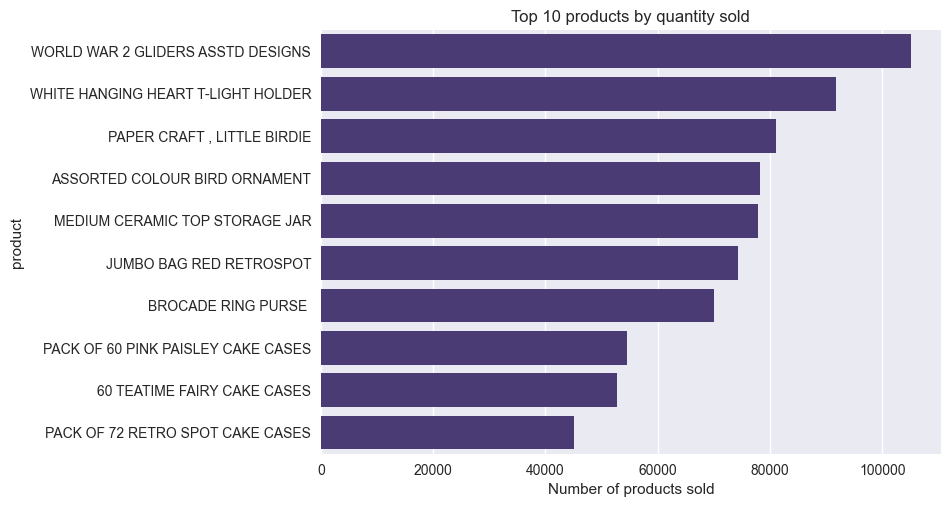

In [93]:
top_products = df.groupby(df["Description"])["Quantity"].sum().nlargest(10)

sns.barplot(x=top_products.values,y=top_products.index)
plt.title("Top 10 products by quantity sold")
plt.ylabel("product")
plt.xlabel("Number of products sold")
plt.show()

##### 4.3 top customers

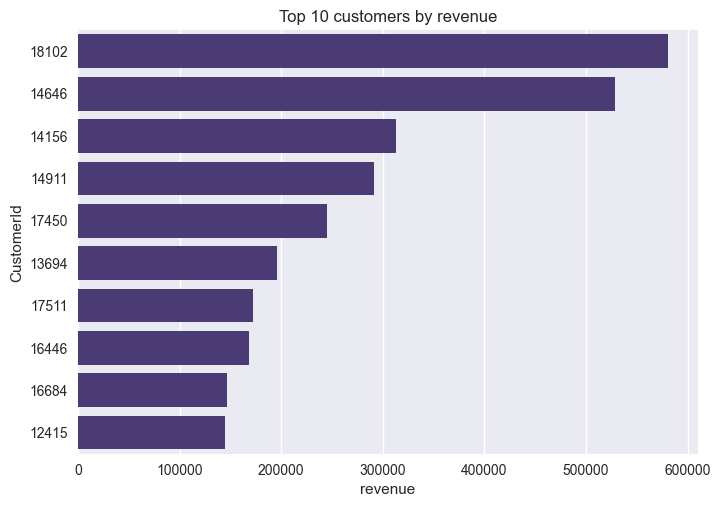

In [94]:
top_customers =df.groupby("CustomerId")['TotalAmount'].sum().nlargest(10)

sns.barplot(x=top_customers.values,y=top_customers.index)
plt.title("Top 10 customers by revenue")
plt.xlabel("revenue")
plt.show()

##### 4.4 Country Analysis

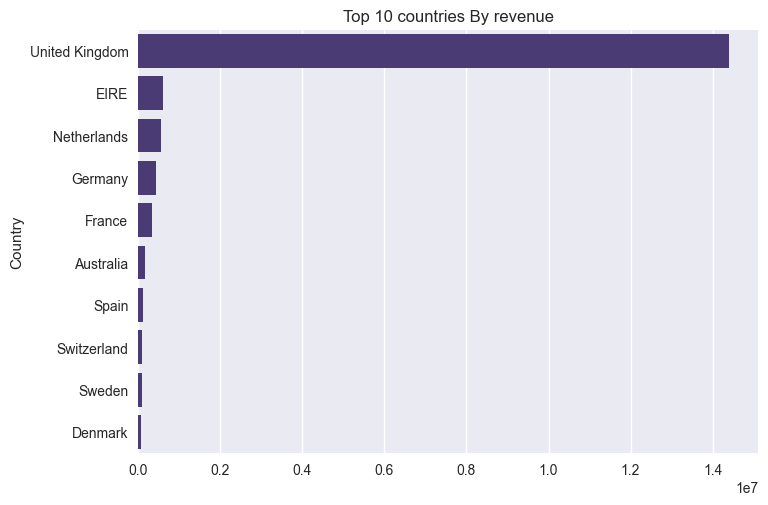

In [95]:
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=country_sales.values,y=country_sales.index)
plt.title("Top 10 countries By revenue")
plt.show()

### 5. Customer segmentation (RFM Analysis /Recency, frequency, Monetary)

##### 5.1 Build RFM table

In [96]:
# snapshot date( last incoice date)
snapshot_date = df['InvoiceDate'].max()+pd.Timedelta(days=1)

# RFM calculation (Recency = snapshot_date - last_purchase_date)
rfm = df.groupby('CustomerId').agg({
    'InvoiceDate':lambda x:(snapshot_date - x.max()).days, # Recency
    'InvoiceNo':'nunique', #Frequency
    'TotalAmount':'sum' # Monetary,
    
})

rfm.rename(columns={
    'InvoiceDate':'Recency',
    'InvoiceNo':'Frequency',
    'TotalAmount':'Monetary'
},inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerId,,,
12346,326,12,77556.46
12347,2,8,4921.53
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40


##### 5.2 Distribution Plots


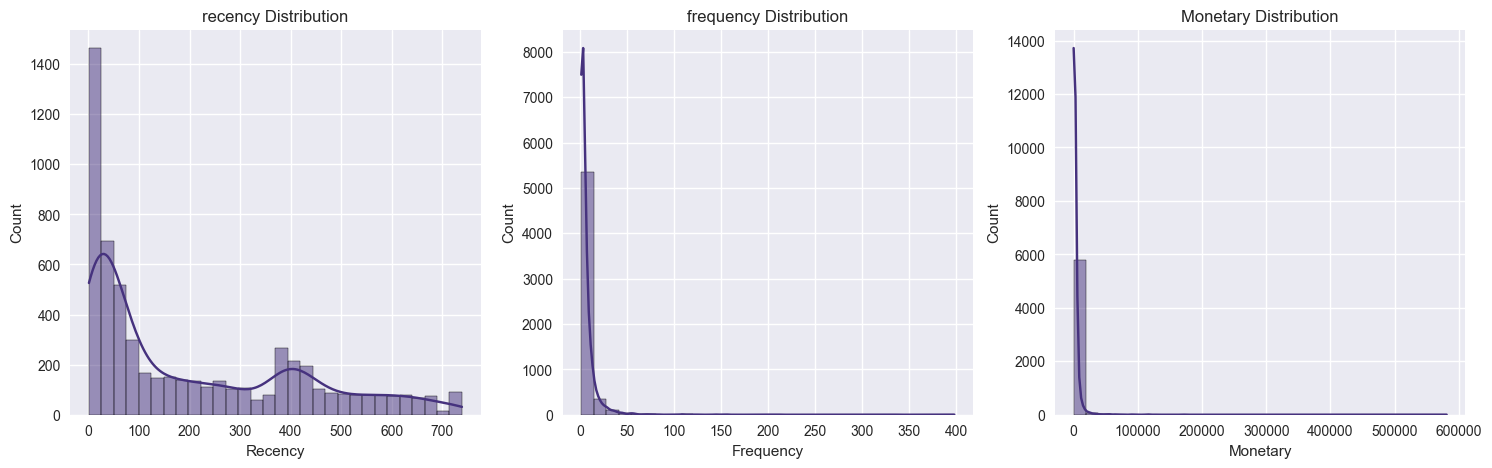

In [97]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.histplot(rfm['Recency'],bins=30,ax=axes[0],kde=True)
axes[0].set_title("recency Distribution")

sns.histplot(rfm['Frequency'],bins=30,ax=axes[1],kde= True)
axes[1].set_title("frequency Distribution")

sns.histplot(rfm['Monetary'],bins=30,ax=axes[2],kde= True)
axes[2].set_title("Monetary Distribution")

plt.show()



##### 5.3 segmenting customers based on rank

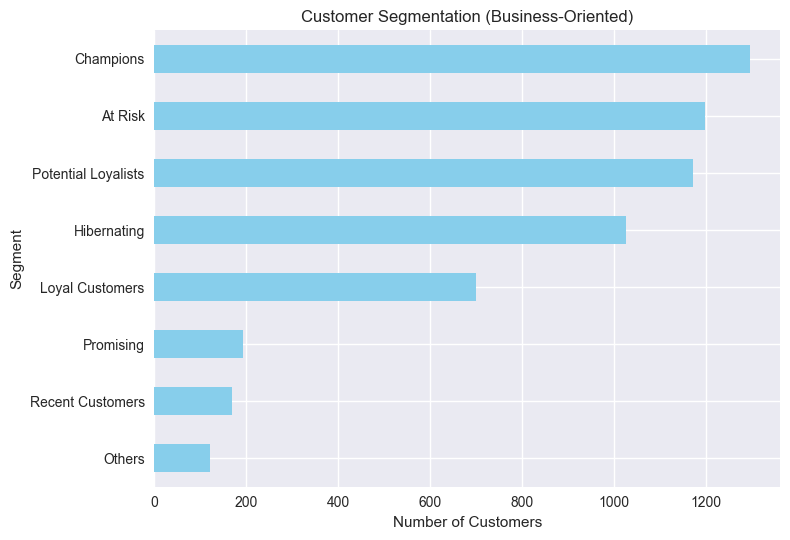

In [98]:
#Assign RFM Scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

#combine scores into rfm score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)+rfm['M_Score'].astype(str)
# This forms a string like '555' or '312' for each customer.

#customer segments
def segment_customer(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 4:
        return 'Loyal Customers'
    elif r >= 3 and f >= 2:
        return 'Potential Loyalists'
    elif r >= 4 and f <= 2:
        return 'Recent Customers'
    elif r == 3 and f <= 2:
        return 'Promising'
    elif r <= 2 and f >= 2 and m >= 2:
        return 'At Risk'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    elif r == 1 and f == 1 and m == 1:
        return 'Lost'
    else:
        return 'Others'
rfm['Segment'] = rfm.apply(segment_customer,axis=1)

# Sort segment counts in descending order before plotting
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

# Plot
segment_counts.plot(kind='barh', color='skyblue')
plt.title("Customer Segmentation (Business-Oriented)")
plt.xlabel("Number of Customers")
plt.tight_layout()
plt.show()



In [107]:
segment_summary = rfm.groupby('Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','sum'],
    'Segment':'count'
}).sort_values(('Monetary','sum'), ascending=False)

# Flatten MultiIndex columns
segment_summary.columns = ['Recency_mean', 'Frequency_mean', 'Monetary_mean', 'Monetary_sum', 'CustomerCount']

# Convert Monetary_sum to millions
segment_summary['Monetary_sum'] = segment_summary['Monetary_sum'] / 1_000_000 
# Format as €X.XXM
segment_summary['Monetary_sum'] = segment_summary['Monetary_sum'].apply(lambda x: f"€{x:,.2f} M")

# Sort by Monetary_sum (descending)
segment_summary = segment_summary.sort_values('Monetary_sum', ascending=False)

# Optionally round values
segment_summary = segment_summary.round(2)

segment_summary

,Recency_mean,Frequency_mean,Monetary_mean,Monetary_sum,CustomerCount
Segment,,,,,
Champions,19.96,17.11,9143.86,€11.86 M,1297
At Risk,384.99,3.91,1586.28,€1.90 M,1199
Loyal Customers,84.37,7.74,2648.60,€1.86 M,701
Potential Loyalists,59.29,2.58,1088.34,€1.28 M,1173
Hibernating,475.67,1.08,212.52,€0.22 M,1026
Others,442.49,1.49,1014.82,€0.12 M,122
Promising,105.36,1.00,429.16,€0.08 M,192
Recent Customers,29.73,1.00,331.51,€0.06 M,168


### 6. Clustering (KMeans on RFM)

##### 6.1 scaling Data

In [108]:
# # For clustering, only keep numeric RFM values
rfm_features = rfm[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

rfm_scaled[:5]


array([[ 0.59558355,  0.43899789,  5.16637797],
       [-0.95227909,  0.13150188,  0.13612743],
       [-0.60353226, -0.09912012, -0.06485633],
       [-0.87106408, -0.17599412,  0.10199635],
       [ 0.51914589, -0.40661612, -0.18154911]])

##### 6.2 Find Optimal Cluster (Elbow Method)

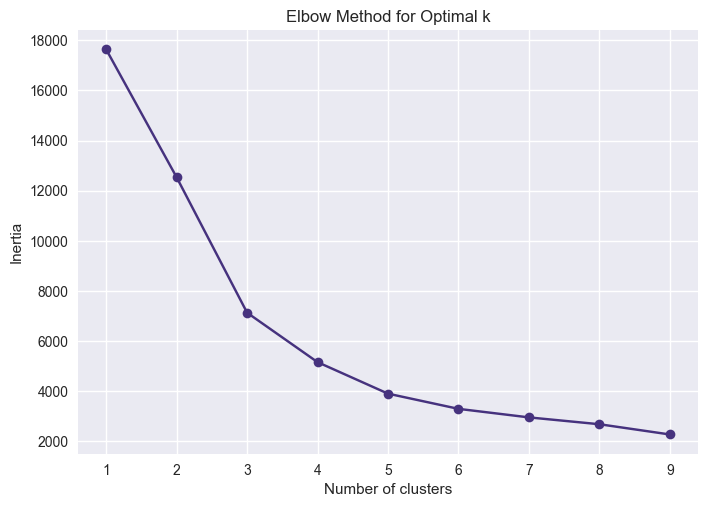

In [109]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()    


##### 6.3 Apply Kmeans

In [110]:
kmeans =KMeans(n_clusters=4,random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

##### 6.4 Segmentation + Clustering Combined

Cluster                0     1   2  3
Segment                              
At Risk              939   258   2  0
Champions              0  1261  32  4
Hibernating          955    71   0  0
Loyal Customers        0   701   0  0
Others               109    13   0  0
Potential Loyalists    0  1172   1  0
Promising              0   192   0  0
Recent Customers       0   168   0  0


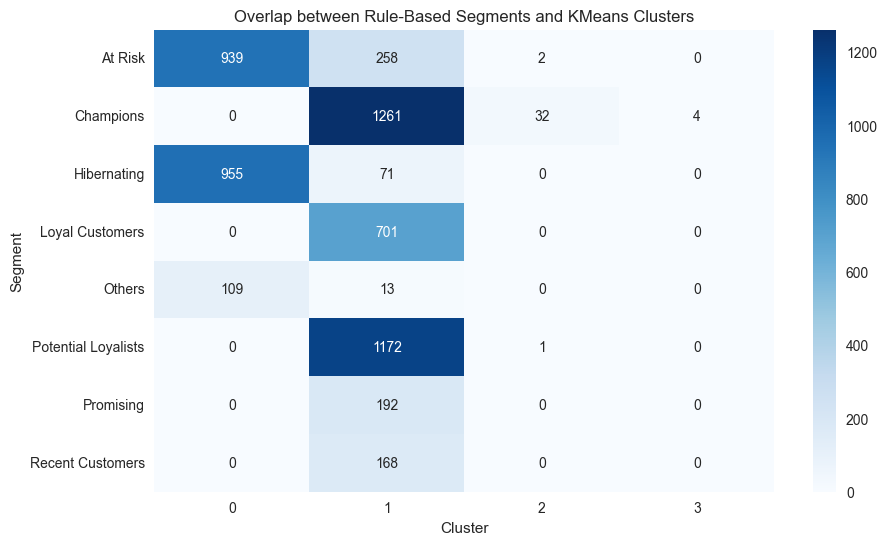

,Cluster,Recency,Frequency,Monetary
0,0,462.52,2.21,749.23
1,1,66.76,7.31,2948.95
2,2,25.94,103.71,81356.34
3,3,3.50,212.50,428612.00


In [118]:
# Keep only numeric features for clustering
rfm_features = rfm[['Recency','Frequency','Monetary']]

# Scale data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Run KMeans (choose k from Elbow/analysis, e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

# compare segments vs clusters
comparison_table = pd.crosstab(rfm['Segment'],rfm['Cluster'])
print(comparison_table)

# heat map to visualize the data
plt.figure(figsize=(10,6))
sns.heatmap(comparison_table,annot=True,fmt='d',cmap='Blues')
plt.title("Overlap between Rule-Based Segments and KMeans Clusters")
plt.show()

# cluster profiling
cluster_profile = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().reset_index()
cluster_profile = cluster_profile.round(2)
cluster_profile



### 7. Cluster Analysis & Visualization

##### 7.1 Cluster Summary

In [114]:
# Only select numeric columns for mean calculation
numeric_cols = ['Recency', 'Frequency', 'Monetary']
cluster_summary = rfm.groupby('Cluster')[numeric_cols].mean()
cluster_summary = cluster_summary.round(2)
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,462.52,2.21,749.23
1,66.76,7.31,2948.95
2,25.94,103.71,81356.34
3,3.50,212.50,428612.00


##### 7.2 Visuaize clusters

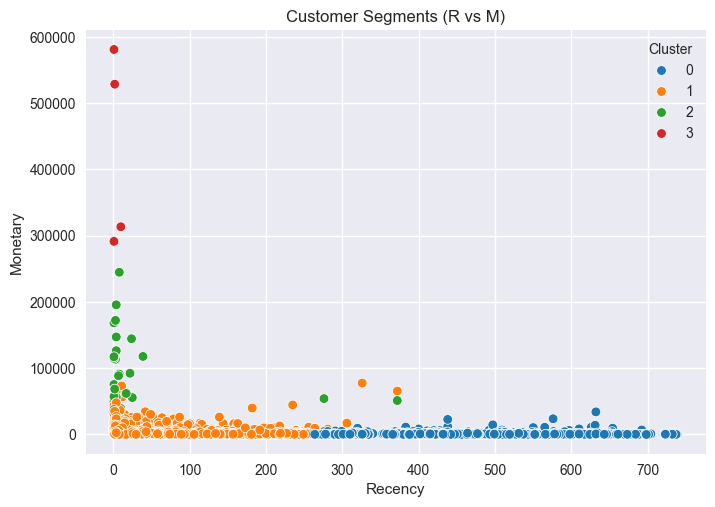

In [119]:
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title("Customer Segments (R vs M)")
plt.show()


### 8. Churn Analysis

##### 8.1 Define the churn label

In [123]:
#We’ll define churn as:
#  Customers who have not purchased in the last 3 months of the dataset window.

# Last purchase date per customer
last_purchase = df.groupby('CustomerId')['InvoiceDate'].max().reset_index()

# Cutoff date = 6 months before dataset max
cutoff_date = df['InvoiceDate'].max() - pd.Timedelta(days=180)

# Label churn
last_purchase['Churned'] = last_purchase['InvoiceDate'] < cutoff_date
# Merge back into RFM dataframe

# Remove Churned if it already exists
if 'Churned' in rfm.columns:
    rfm = rfm.drop(columns=['Churned'])

# Now merge safely
rfm = rfm.merge(last_purchase[['CustomerId', 'Churned']], on='CustomerId', how='left')

rfm[['Recency','Frequency','Monetary','Segment','Cluster','Churned']].head()
rfm.head()
rfm.to_csv("customer_segments.csv")

##### 8.2 Overal Churn Rate

Overall Churn Rate :40.83%


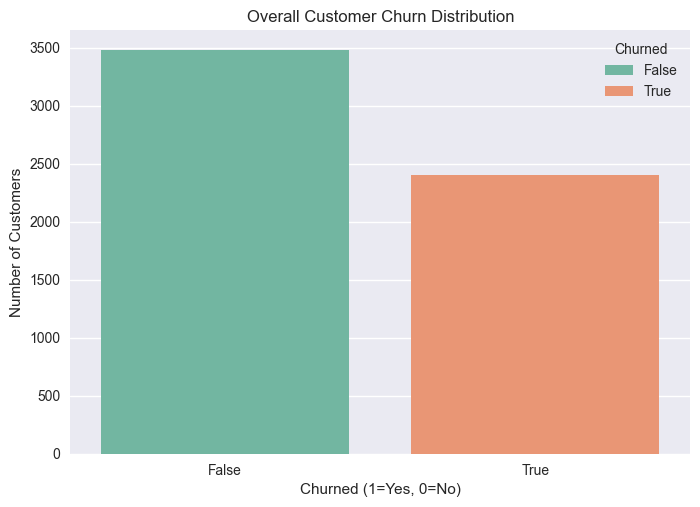

In [124]:
churn_rate = rfm['Churned'].mean() *100
print(f'Overall Churn Rate :{churn_rate:.2f}%')

sns.countplot(x='Churned', data=rfm, palette="Set2",hue="Churned")
plt.title("Overall Customer Churn Distribution")
plt.xlabel("Churned (1=Yes, 0=No)")
plt.ylabel("Number of Customers")
plt.show()

##### 8.3 Churn by RFM segment

C:\Users\dante\AppData\Local\Temp\ipykernel_13784\236494243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_segment.values, y=churn_by_segment.index, palette="Reds_r")


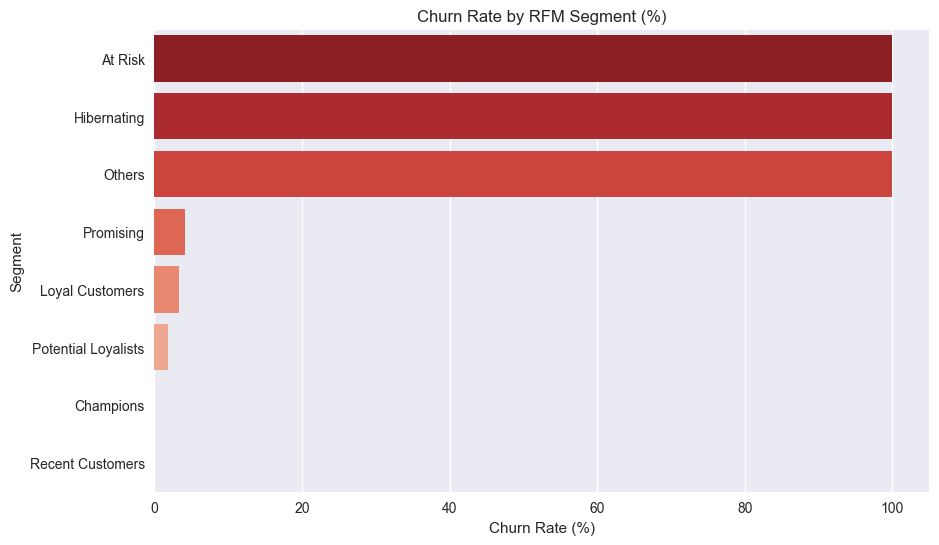

Segment
At Risk                100.00
Hibernating            100.00
Others                 100.00
Promising                4.17
Loyal Customers          3.28
Potential Loyalists      1.88
Champions                0.00
Recent Customers         0.00
Name: Churned, dtype: float64

In [126]:
churn_by_segment = rfm.groupby('Segment')['Churned'].mean().sort_values(ascending=False) *100

plt.figure(figsize=(10,6))
sns.barplot(x=churn_by_segment.values, y=churn_by_segment.index, palette="Reds_r")
plt.title("Churn Rate by RFM Segment (%)")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Segment")
plt.show()
churn_by_segment = churn_by_segment.round(2)
churn_by_segment

##### 8.4 Churn By cluster


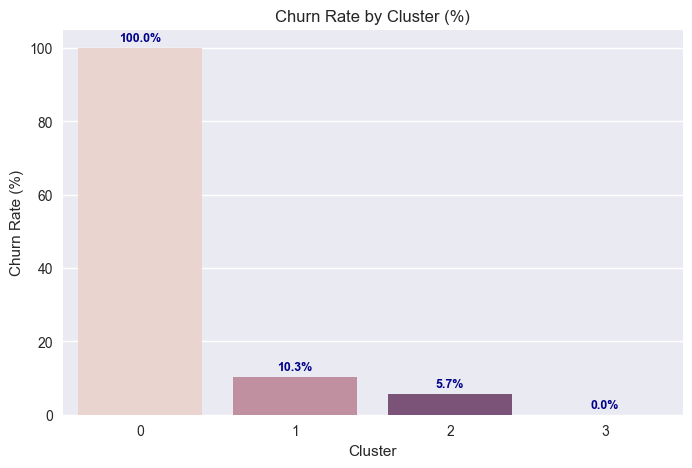

Cluster
0    100.000000
1     10.297185
2      5.714286
3      0.000000
Name: Churned, dtype: float64

In [ ]:
churn_by_cluster = rfm.groupby('Cluster')['Churned'].mean().sort_values(ascending=False) *100

plt.figure(figsize = (8,5))
ax = sns.barplot(x=churn_by_cluster.index,y=churn_by_cluster.values,hue=churn_by_cluster.index,legend=False)

# Annotate bars with churn %
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    ax.text(
        x,
        height + 1,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        color='darkblue',
        fontweight='bold'
    )

plt.title("Churn Rate by Cluster (%)")
plt.xlabel("Cluster")
plt.ylabel("Churn Rate (%)")
plt.show()
churn_by_cluster

##### 8.5 Cross segmentation (segment +clusters)

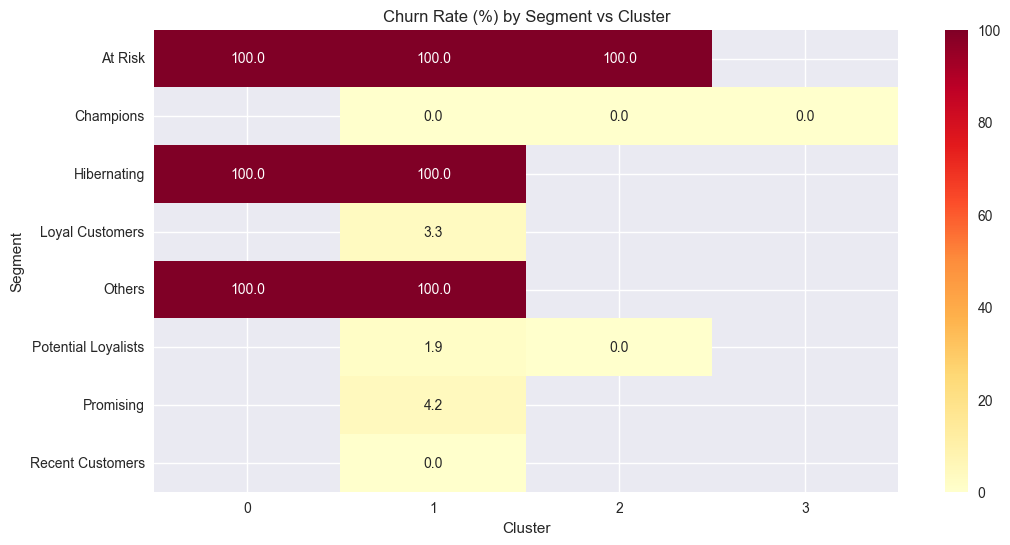

Cluster,0,1,2,3
Segment,,,,
At Risk,100.0,100.000000,100.0,NaN
Champions,NaN,0.000000,0.0,0.0
Hibernating,100.0,100.000000,NaN,NaN
Loyal Customers,NaN,3.281027,NaN,NaN
Others,100.0,100.000000,NaN,NaN
Potential Loyalists,NaN,1.877133,0.0,NaN
Promising,NaN,4.166667,NaN,NaN
Recent Customers,NaN,0.000000,NaN,NaN


In [128]:
churn_cross = pd.crosstab(rfm['Segment'],rfm['Cluster'],values=rfm['Churned'],aggfunc='mean')*100

plt.figure(figsize=(12,6))
sns.heatmap(churn_cross, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Churn Rate (%) by Segment vs Cluster")
plt.show()
churn_cross

### 9 . forecasting


14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:52 - cmdstanpy - INFO - Chain [1] done processing


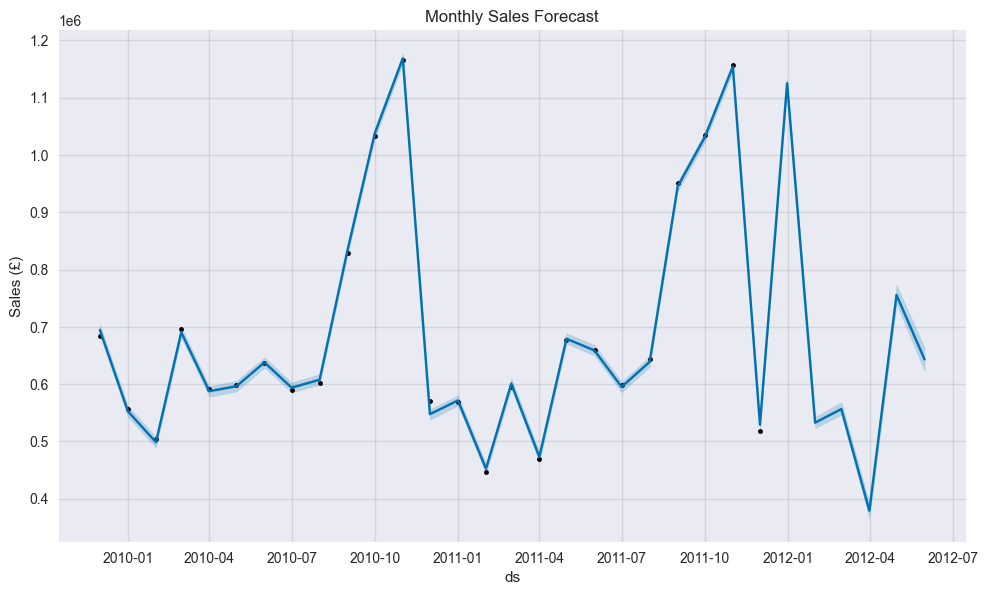

In [130]:
from prophet import Prophet

# Aggregate monthly sales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalAmount'].sum().reset_index()
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

# Prepare data for Prophet
sales = monthly_sales.rename(columns={'InvoiceDate':'ds','TotalAmount':'y'})

# Build and fit model
model = Prophet()
model.fit(sales)

# Make forecast for next 6 months
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Monthly Sales Forecast")
plt.ylabel("Sales (£)")
plt.show()
